<a href="https://colab.research.google.com/github/Thanawat2002/colab/blob/main/Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import spacy # another function for NLP
import nltk
import en_core_web_sm

# โหลดโมเดล NLP สำหรับภาษาอังกฤษ (English) ของ library spacy
nlp = en_core_web_sm.load()  # Loading english large corpus

In [111]:
from google.colab import drive
drive.mount('/content/drive') #ระวังเครื่องหมาย ‘ กับ ' ต่างกันนะคะ

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [188]:
path = '/content/drive/MyDrive/Colab Notebooks/dataset/Instruments_Reviews_two_column.csv'
df_raw = pd.read_csv(path) ## Dataset is now stored in a Pandas Dataframe
df_raw

,reviewText,overall
0,"Not much to write about here, but it does exac...",5
1,The product does exactly as it should and is q...,5
2,The primary job of this device is to block the...,5
3,Nice windscreen protects my MXL mic and preven...,5
4,This pop filter is great. It looks and perform...,5
...,...,...
1994,This is nearly identical to theGuardian Cases ...,3
1995,When I was looking for a Bass Case I just want...,4
1996,These are by no means touring cases. They're i...,4
1997,I had a Cannon brand clutch and I bought this ...,5


In [189]:
df_raw.isnull().sum()

reviewText    0
overall       0
dtype: int64

In [190]:
df_counts = df_raw["overall"].value_counts().reset_index()
df_counts.head()

,index,overall
0,5,1366
1,4,431
2,3,139
3,2,37
4,1,26


,reviewText,overall,sentiment
0,"Not much to write about here, but it does exac...",5,positive
1,The product does exactly as it should and is q...,5,positive
2,The primary job of this device is to block the...,5,positive
3,Nice windscreen protects my MXL mic and preven...,5,positive
4,This pop filter is great. It looks and perform...,5,positive
...,...,...,...
1994,This is nearly identical to theGuardian Cases ...,3,neutral
1995,When I was looking for a Bass Case I just want...,4,negative
1996,These are by no means touring cases. They're i...,4,negative
1997,I had a Cannon brand clutch and I bought this ...,5,positive


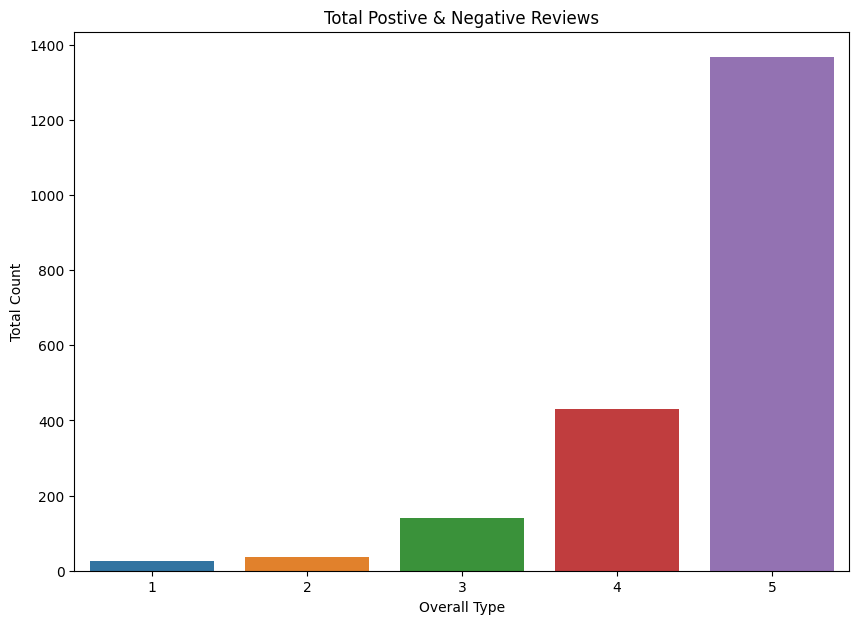

In [191]:
# So we can say that we almost have same number of reviews. That mean we have very good data.
plt.figure(figsize=(10, 7))
sns.barplot(data=df_counts, x='index', y='overall')
plt.xlabel("Overall Type");
plt.ylabel("Total Count");
plt.title("Total Postive & Negative Reviews");
# for i in df_raw["overall"]:
#   if int(i) > 4:
#     i["sentiment"] = "positive"
#   elif int(i) == 4:
#     i["sentiment"] = "neutial"
#   else:
#     i["sentiment"] = "negative"
df_raw["sentiment"] = df_raw["overall"].apply(lambda x: 'positive' if x > 4 else ('neutral' if x == 3 else 'negative'))
df_raw

In [192]:
df_raw

,reviewText,overall,sentiment
0,"Not much to write about here, but it does exac...",5,positive
1,The product does exactly as it should and is q...,5,positive
2,The primary job of this device is to block the...,5,positive
3,Nice windscreen protects my MXL mic and preven...,5,positive
4,This pop filter is great. It looks and perform...,5,positive
...,...,...,...
1994,This is nearly identical to theGuardian Cases ...,3,neutral
1995,When I was looking for a Bass Case I just want...,4,negative
1996,These are by no means touring cases. They're i...,4,negative
1997,I had a Cannon brand clutch and I bought this ...,5,positive


In [193]:
#The itertuples() function is used to iterate over DataFrame rows as namedtuples. If True, return the index as the first element of the tuple. The name of the returned namedtuples or None to return regular tuples.
empty_review_index = []
for i, reviewText, overall, sentiment in df_raw.itertuples():
    # if review type is string
    if type(reviewText) == str:
        #if review is empty space
        if reviewText.isspace():
            # Appent its index to the list
            empty_review_index.append(i)

In [194]:
empty_review_index # So we do not have any empty review

[]

In [195]:
import re # for regular expression

In [206]:
import re
pos_token = [] # to save positive tokens
neg_token = [] # to save negative tokens
neu_token = []
corpus=[]
noun = []
def process_reviews(df):
    for index, reviews, overall, sentiment in df.itertuples():
        if type(reviews) == str:
            reviews = re.sub('[^a-zA-Z]', ' ', reviews)
            reviews = reviews.lower()
            doc = nlp(reviews) #nlp("...") ถูกใช้เพื่อประมวลผลข้อความและสร้าง doc ที่เก็บข้อมูลเกี่ยวกับข้อความที่ถูกประมวลผลและสามารถใช้ในการวิเคราะห์ข้อความต่อไปได้.
            temp = []
            for token in doc:
                if not token.text.isspace():
                    if not token.is_stop and len(token.text) > 2:
                        if token.pos_ == 'NOUN':
                            noun.append(token.text)
                        if sentiment == "positive":
                            pos_token.append(token.text)
                        elif sentiment == "neg":
                            neg_token.append(token.text)
                        else:
                            neu_token.append(token.text)


                        temp.append(token.lemma_)
                        corpus.append(' '.join(temp))

In [196]:
process_reviews(df_raw)

In [197]:
pos_token[0:10]

['write',
 'exactly',
 'supposed',
 'filters',
 'pop',
 'sounds',
 'recordings',
 'crisp',
 'lowest',
 'prices']

In [198]:
neu_token[0:10]

['use',
 'cable',
 'run',
 'output',
 'pedal',
 'chain',
 'input',
 'fender',
 'amp',
 'bought']

In [199]:
neg_token[0:10]

[]

In [152]:
from nltk import FreqDist

In [153]:
# preparing frequency distribution variables
freq_pos = FreqDist(pos_token)
freq_neu = FreqDist(neu_token)
freq_neg = FreqDist(neg_token)

In [203]:
freq_pos

FreqDist({'guitar': 851, 'strings': 729, 'great': 560, 'sound': 450, 'good': 445, 'like': 435, 'use': 418, 'picks': 296, 'string': 234, 'price': 222, ...})

In [204]:
freq_neu

FreqDist({'strings': 104, 'guitar': 88, 'use': 69, 'good': 69, 'like': 67, 'sound': 54, 'string': 43, 'better': 41, 'pedal': 36, 'don': 36, ...})

In [205]:
freq_neg

FreqDist({'guitar': 278, 'strings': 265, 'like': 219, 'good': 214, 'use': 183, 'sound': 176, 'great': 142, 'pedal': 129, 'don': 119, 'little': 117, ...})

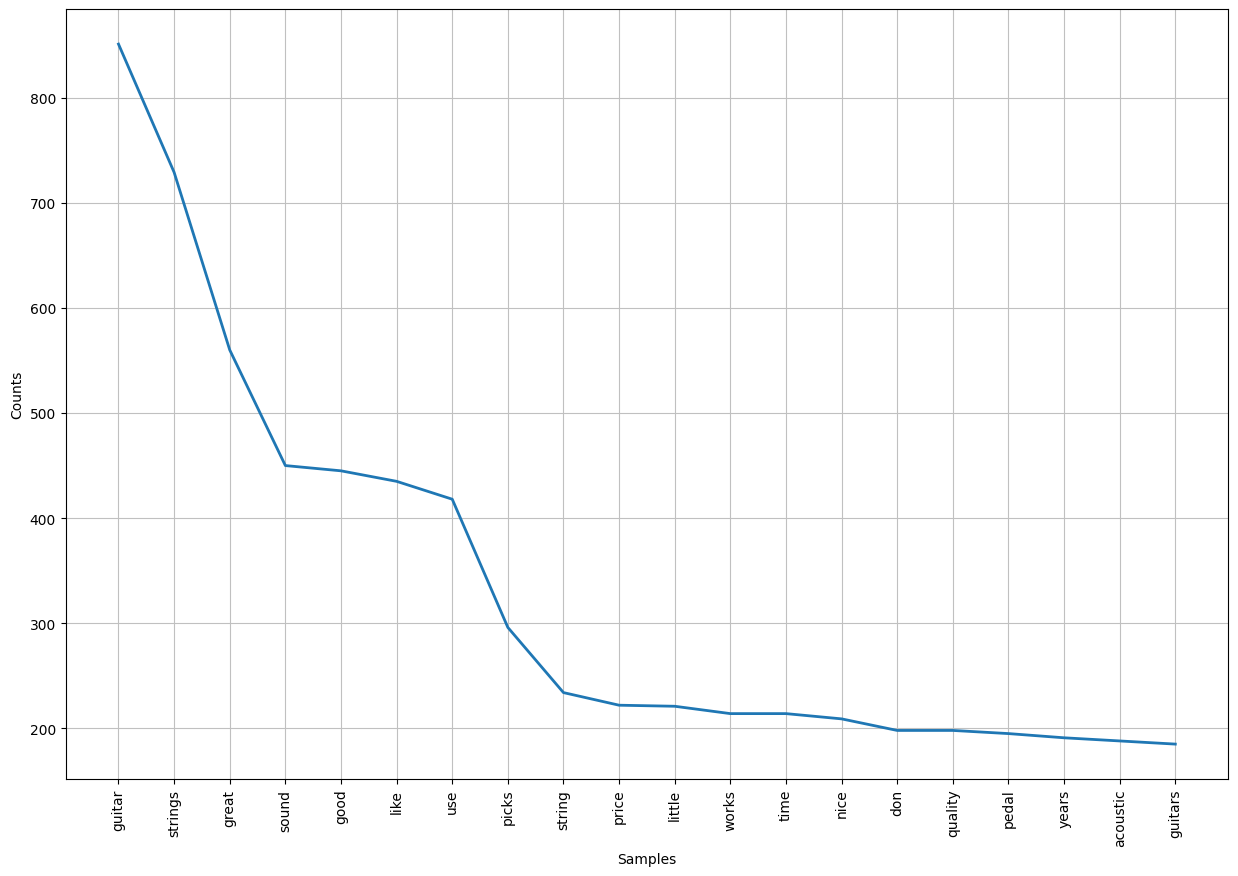

<Axes: xlabel='Samples', ylabel='Counts'>

In [200]:
# Top 20 most repeated words in positive comments
plt.figure(figsize=(15, 10))
freq_pos.plot(20)

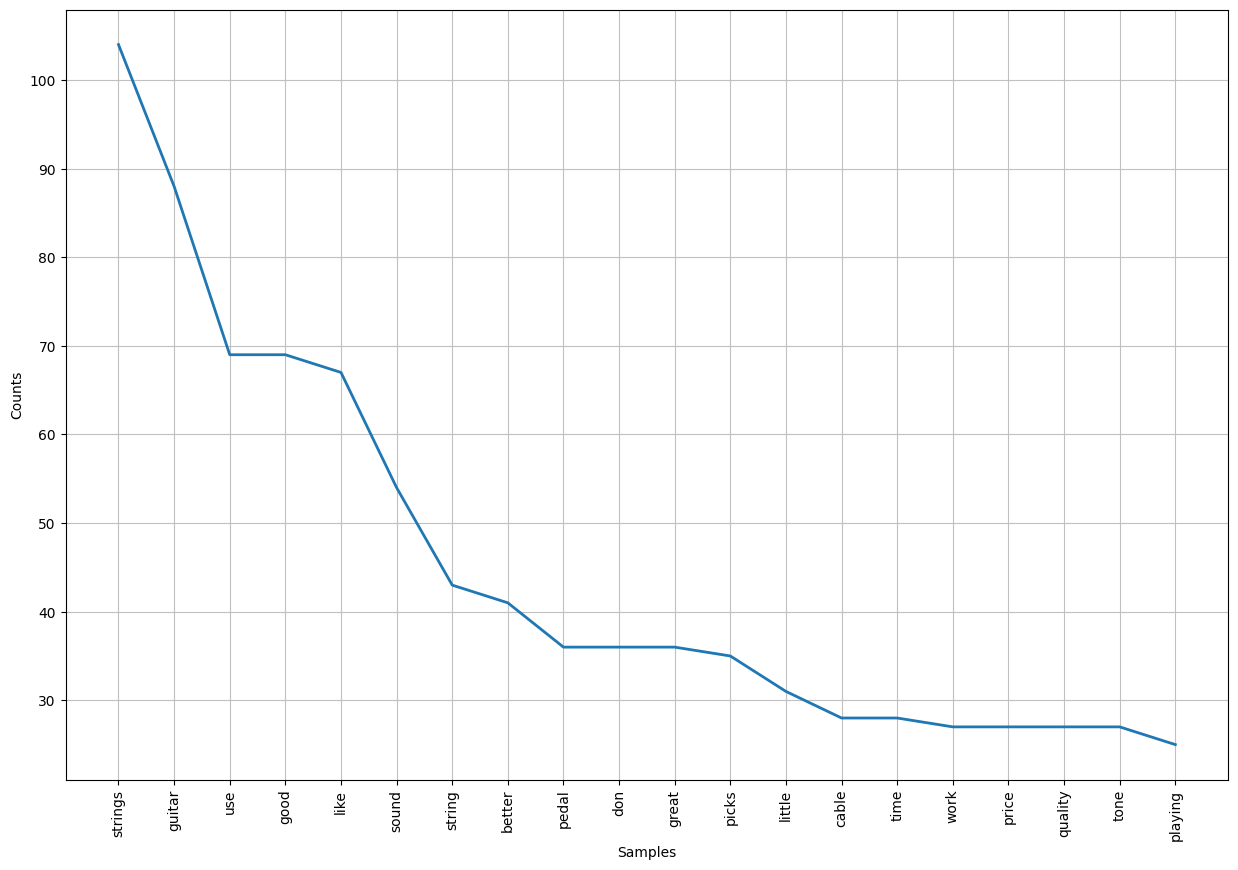

<Axes: xlabel='Samples', ylabel='Counts'>

In [201]:
plt.figure(figsize=(15, 10))
freq_neu.plot(20)

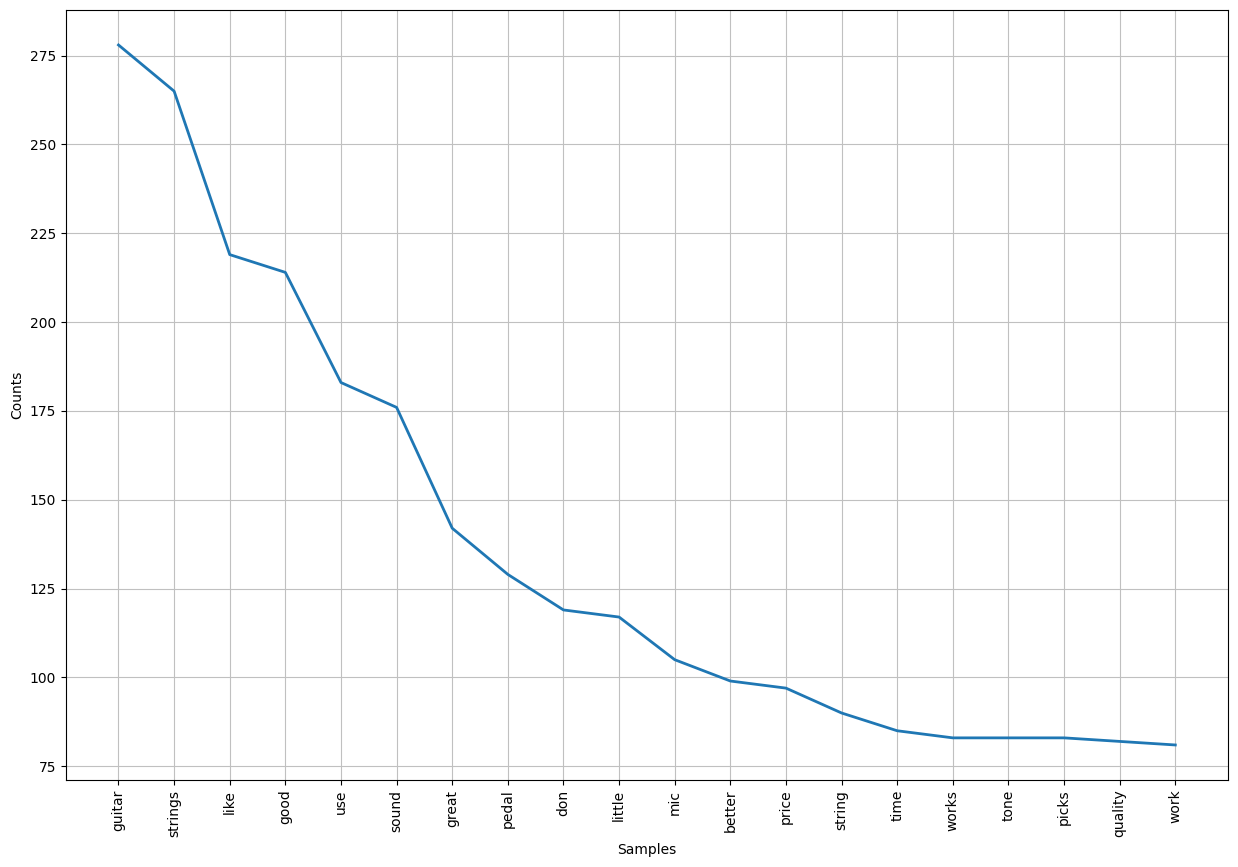

<Axes: xlabel='Samples', ylabel='Counts'>

In [202]:
plt.figure(figsize=(15, 10))
freq_neg.plot(20)

In [160]:
noun[0:10]

['pop',
 'recordings',
 'prices',
 'filters',
 'pricing',
 'product',
 'bonus',
 'screens',
 'hint',
 'smell']

In [161]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

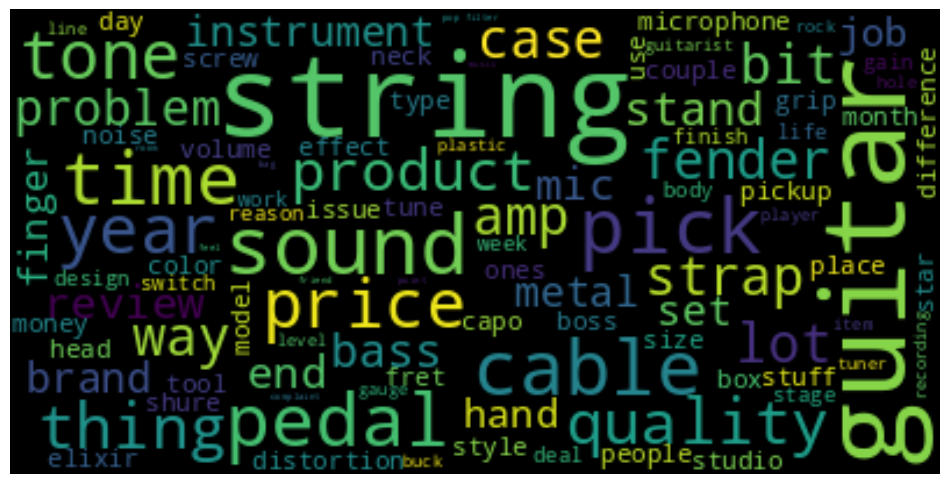

In [162]:
# Most famous nouns used in movie reviews

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(' '.join(noun))
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation="bilinear") # การแก้ไขรูปภาพจะเป็นวิธี bilinear
plt.axis("off")
plt.show()

In [163]:
df_raw

,reviewText,overall,sentiment
0,"Not much to write about here, but it does exac...",5,positive
1,The product does exactly as it should and is q...,5,positive
2,The primary job of this device is to block the...,5,positive
3,Nice windscreen protects my MXL mic and preven...,5,positive
4,This pop filter is great. It looks and perform...,5,positive
...,...,...,...
1994,This is nearly identical to theGuardian Cases ...,3,neutral
1995,When I was looking for a Bass Case I just want...,4,negative
1996,These are by no means touring cases. They're i...,4,negative
1997,I had a Cannon brand clutch and I bought this ...,5,positive


In [164]:
#sentiment analysis with TextBlob
from textblob import TextBlob
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df_raw['Subjectivity'] = df_raw["reviewText"].apply(getSubjectivity)
df_raw['Polarity'] = df_raw["reviewText"].apply(getPolarity)

df_raw

,reviewText,overall,sentiment,Subjectivity,Polarity
0,"Not much to write about here, but it does exac...",5,positive,0.398611,0.250000
1,The product does exactly as it should and is q...,5,positive,0.394444,0.052778
2,The primary job of this device is to block the...,5,positive,0.434286,0.167500
3,Nice windscreen protects my MXL mic and preven...,5,positive,0.925000,0.200000
4,This pop filter is great. It looks and perform...,5,positive,0.750000,0.800000
...,...,...,...,...,...
1994,This is nearly identical to theGuardian Cases ...,3,neutral,0.437615,0.073011
1995,When I was looking for a Bass Case I just want...,4,negative,0.554167,0.100000
1996,These are by no means touring cases. They're i...,4,negative,0.552121,0.289970
1997,I had a Cannon brand clutch and I bought this ...,5,positive,0.325926,0.096296


In [165]:
df_raw["sentiment_TextBlob_score"] = df_raw["Polarity"].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))

In [166]:
df_raw

,reviewText,overall,sentiment,Subjectivity,Polarity,sentiment_TextBlob_score
0,"Not much to write about here, but it does exac...",5,positive,0.398611,0.250000,positive
1,The product does exactly as it should and is q...,5,positive,0.394444,0.052778,positive
2,The primary job of this device is to block the...,5,positive,0.434286,0.167500,positive
3,Nice windscreen protects my MXL mic and preven...,5,positive,0.925000,0.200000,positive
4,This pop filter is great. It looks and perform...,5,positive,0.750000,0.800000,positive
...,...,...,...,...,...,...
1994,This is nearly identical to theGuardian Cases ...,3,neutral,0.437615,0.073011,positive
1995,When I was looking for a Bass Case I just want...,4,negative,0.554167,0.100000,positive
1996,These are by no means touring cases. They're i...,4,negative,0.552121,0.289970,positive
1997,I had a Cannon brand clutch and I bought this ...,5,positive,0.325926,0.096296,positive


In [167]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [168]:
accuracy_score(df_raw["sentiment"], df_raw["sentiment_TextBlob_score"])

0.671335667833917

In [169]:
# import library for sntiment analysis.
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.downloader.download('vader_lexicon') #download dictionary for english sentiment

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [170]:
sm = SentimentIntensityAnalyzer()

In [171]:
# polarit_Scores acuallly gives one dictionary containing 4 valus. negative, positive, neutral and overall value
# compound. So you can see that below sentence has 0.4 neutral and 0.6 negative and overall -0.6696.
# - sign shows it is a negatvie sentence.
sm.polarity_scores("you are so bad")

{'neg': 0.6, 'neu': 0.4, 'pos': 0.0, 'compound': -0.6696}

In [172]:
# Lets try some more sentences. SO below you can see it contains both negative and positive feedback.
# so nltk is smart enough to undertand it. It actually calculate the score of each word and finally calulates
print(sm.polarity_scores("Star wars is amazing. But the the picturization is not good."))

{'neg': 0.342, 'neu': 0.506, 'pos': 0.152, 'compound': -0.4605}


In [173]:
# Now lets see a wierd thing here. I wrote the same sentense as above but score is different. can you say why?
# Actually if you observer i have capitalize the word AMAZING. So here nltk understands the we want to focus
# on word amazing. That is why below sentence is more positive than the above one. Lets try to capitalize
# more words.
print(sm.polarity_scores("Star wars is AMAZING. But the the picturization is not good."))

{'neg': 0.334, 'neu': 0.495, 'pos': 0.171, 'compound': -0.3904}


In [174]:
print(sm.polarity_scores("Love from my mom"))

{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.6369}


In [175]:
df_raw.head()

,reviewText,overall,sentiment,Subjectivity,Polarity,sentiment_TextBlob_score
0,"Not much to write about here, but it does exac...",5,positive,0.398611,0.250000,positive
1,The product does exactly as it should and is q...,5,positive,0.394444,0.052778,positive
2,The primary job of this device is to block the...,5,positive,0.434286,0.167500,positive
3,Nice windscreen protects my MXL mic and preven...,5,positive,0.925000,0.200000,positive
4,This pop filter is great. It looks and perform...,5,positive,0.750000,0.800000,positive


In [177]:
df_raw["score"] = df_raw["reviewText"].apply(lambda reviewText : sm.polarity_scores(reviewText))

In [178]:
df_raw["sentiment_score"] = df_raw["score"].apply(lambda x: x["compound"])

In [179]:
df_raw.head()

,reviewText,overall,sentiment,Subjectivity,Polarity,sentiment_TextBlob_score,score,sentiment_score
0,"Not much to write about here, but it does exac...",5,positive,0.398611,0.250000,positive,"{'neg': 0.057, 'neu': 0.79, 'pos': 0.153, 'com...",0.6903
1,The product does exactly as it should and is q...,5,positive,0.394444,0.052778,positive,"{'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'comp...",0.9588
2,The primary job of this device is to block the...,5,positive,0.434286,0.167500,positive,"{'neg': 0.113, 'neu': 0.858, 'pos': 0.029, 'co...",-0.7003
3,Nice windscreen protects my MXL mic and preven...,5,positive,0.925000,0.200000,positive,"{'neg': 0.055, 'neu': 0.746, 'pos': 0.199, 'co...",0.5859
4,This pop filter is great. It looks and perform...,5,positive,0.750000,0.800000,positive,"{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'comp...",0.7650


In [180]:
# now lets change our sentiment_score column to binary value 0 or 1.
df_raw["sentiment_score"] = df_raw["sentiment_score"].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))

In [181]:
accuracy_score(df_raw["sentiment"], df_raw["sentiment_score"])

0.6723361680840421

In [182]:
sm.polarity_scores('Yaaa.. You said it was a good movie... :/')

{'neg': 0.212, 'neu': 0.531, 'pos': 0.257, 'compound': 0.128}